<a href="https://colab.research.google.com/github/nandaglhp/MachineLearning_Quiz2/blob/main/05_AnandaGP_Quiz2_OCR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri Mahasiswa

Nama: Ananda Galih Pratiwi

Kelas: TI-3F

Absen: 05

NIM: 2141720045

# Import Library

In [38]:
import tensorflow as tf  # Mengimpor library TensorFlow untuk machine learning.
import numpy as np  # Mengimpor library NumPy untuk operasi numerik.
import pandas as pd  # Mengimpor library Pandas untuk manipulasi data.
import matplotlib.pyplot as plt  # Mengimpor library Matplotlib untuk visualisasi data.
import seaborn as sns  # Mengimpor library Seaborn untuk visualisasi data statistik.
from sklearn.preprocessing import LabelBinarizer  # Mengimpor LabelBinarizer untuk encoding variabel target.
from sklearn.model_selection import train_test_split  # Mengimpor train_test_split untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.metrics import classification_report  # Mengimpor classification_report untuk mengevaluasi klasifikasi model.
import zipfile  # Mengimpor library zipfile untuk bekerja dengan file zip.

# Load Dataset

## Load MNIST

In [39]:
from tensorflow.keras.datasets import mnist

In [40]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [41]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [42]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [43]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [44]:
# Check the label
train_labels.shape

(60000,)

### Combine Train and Test Data

In [45]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [46]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [47]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 1')

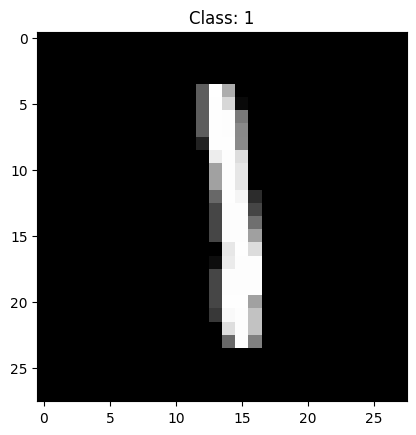

In [48]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

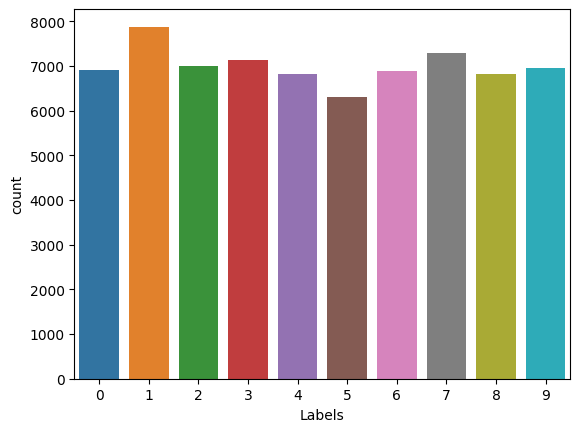

In [49]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [50]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-04 04:16:22--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.4’

alfabeto_A-Z.zip.4  100%[===================>] 184.67M   113MB/s    in 1.6s    

2023-12-04 04:16:24 (113 MB/s) - ‘alfabeto_A-Z.zip.4’ saved [193643888/193643888]



In [51]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [52]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [54]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [55]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [56]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

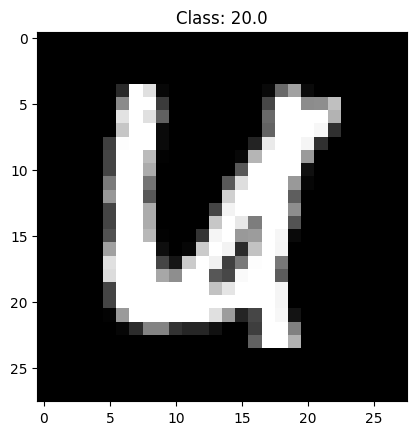

In [57]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

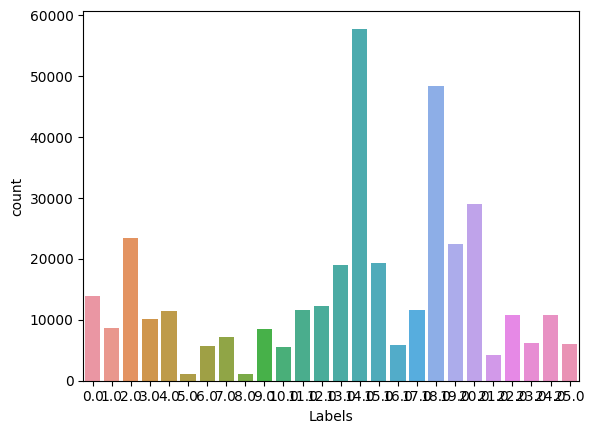

In [58]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [59]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [60]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [61]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [62]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [63]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [64]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [65]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [66]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [67]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [68]:
# Normalisasi data
# Membagi setiap nilai dalam variabel data dengan 255.0.
data /= 255.0

In [69]:
# Check range value of data
# mengecek rentang nilai dari elemen-elemen pada indeks pertama dari variabel 'data'.
data[0].min(), data[0].max()

(0.0, 1.0)

In [70]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
# menggunakan LabelBinarizer untuk mengkodekan label-label dalam variabel 'labels'
# menjadi bentuk biner. LabelBinarizer digunakan untuk mengubah label kategori menjadi representasi biner.
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [71]:
# Check labels shape
# menampilkan bentuk (shape) dari variabel 'labels' setelah dilakukan proses
# transformasi dengan LabelBinarizer.
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

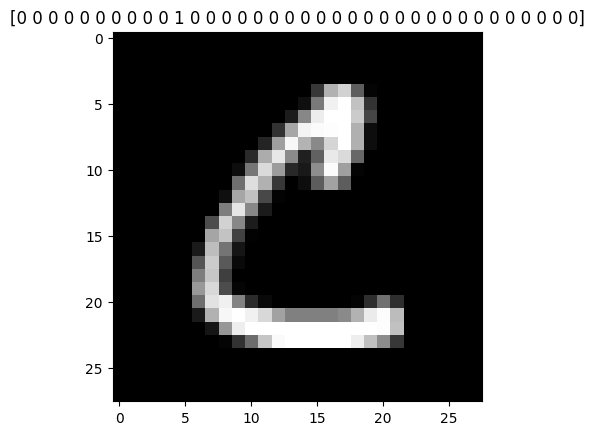

In [72]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))
# menampilkan gambar dari data pada indeks ke-30000 (asumsi data berbentuk
# gambar dengan dimensi 28x28) beserta label biner yang sesuai.

In [73]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

# menghitung jumlah data untuk setiap label pertama dengan menjumlahkan
# nilai-nilai pada setiap kolom dari variabel 'labels'.

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [74]:
# Check the biggest value of data
classes_total.max()
# menampilkan nilai maksimum dari jumlah data pada satu label tertentu.

57825

In [75]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]
# membuat bobot untuk setiap data dengan mengiterasi setiap label dan menghitung
# bobotnya berdasarkan perbandingan jumlah data terbanyak dengan jumlah data pada setiap label.

# Check the weight for each data
classes_weights
# menampilkan bobot yang telah dihitung untuk setiap data.

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Penjelasan Konsep Preprocessing

Proses normalisasi data ini bertujuan untuk mengubah rentang nilai setiap fitur data menjadi kisaran antara 0 hingga 1. Dengan melakukan normalisasi ini, perbedaan skala nilai antar fitur bisa disamakan, mempermudah model dalam mempelajari pola-pola yang ada dalam dataset. Misalnya, jika dataset berisi gambar, normalisasi akan mengubah intensitas piksel dari rentang 0 hingga 255 menjadi rentang 0 hingga 1, yang umumnya diperlukan dalam proses pelatihan model.

Proses encoding label menggunakan Label Binarizer memiliki tujuan untuk mengonversi label kategori menjadi representasi biner. Hasil dari encoding ini akan memberikan representasi biner untuk setiap label yang ada dalam dataset. Representasi ini biasanya berbentuk matriks dengan jumlah baris yang sama dengan jumlah sampel data dan jumlah kolom yang sesuai dengan jumlah kelas atau label yang ada dalam dataset. Sebagai contoh, jika terdapat 3 kelas label, hasil encoding akan membentuk matriks dengan 3 kolom, masing-masing mewakili salah satu label dengan nilai biner 0 atau 1.

Tampilan gambar yang ditampilkan merupakan representasi visual dari data. Dalam konteks ini, gambar yang ditampilkan adalah gambar dari dataset yang memiliki label biner tertentu. Misalnya, jika kita menampilkan gambar yang sesuai dengan label biner [0, 1, 0] dari dataset, kita akan melihat visualisasi gambar yang sesuai dengan label biner tersebut.

Bobot yang diberikan untuk setiap label bertujuan untuk menangani ketidakseimbangan dalam dataset. Bobot ini memberikan penekanan lebih pada data yang jumlahnya lebih sedikit. Dengan memberikan bobot ini, model machine learning cenderung lebih memperhatikan data yang kurang representatif agar dapat mempelajari pola yang ada secara lebih baik.

Jadi, hasil dari proses preprocessing ini meliputi normalisasi data guna menyamakan skala nilai, encoding label dengan menggunakan Label Binarizer untuk mendapatkan representasi biner, serta penggunaan bobot untuk menangani ketidakseimbangan data yang memungkinkan model untuk belajar dari data yang kurang representatif.

# Split Data to Train and Test

> Indented block



In [76]:
# Split Data to Train and Test
# Memisahkan data menjadi data latih dan data uji
# `train_test_split` akan membagi data dan labelnya menjadi data latih (train) dan data uji (test)
# test_size = 0.2 menandakan proporsi data yang dialokasikan untuk data uji sebesar 20%
# random_state = 1 digunakan untuk menghasilkan pembagian yang sama jika kode ini dijalankan lebih dari satu kali
# stratify = labels bertujuan untuk memastikan proporsi kelas yang sama di antara data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

## Create Data Augmentation

In [77]:
# Import library
# Mengimpor library yang dibutuhkan untuk augmentasi data menggunakan ImageDataGenerator dari TensorFlow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
# ImageDataGenerator akan menghasilkan variasi data baru dari data yang ada dengan menerapkan transformasi tertentu
# Berbagai parameter seperti rotasi, zoom, pergeseran, dan flip horizontal bisa diterapkan pada gambar
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [79]:
# Import library

# Import library yang diperlukan dari TensorFlow untuk membangun model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [80]:
# Build the network
# Membangun arsitektur jaringan neural

network = Sequential()  # Membuat model sequential dari Keras

# Menambahkan lapisan konvolusi pertama dengan 32 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan input berukuran (28,28,1)
network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Menambahkan lapisan max pooling dengan ukuran pool 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Menambahkan lapisan konvolusi kedua dengan 64 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan padding 'same'
network.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

# Menambahkan lapisan max pooling dengan ukuran pool 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Menambahkan lapisan konvolusi ketiga dengan 128 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan padding 'valid'
network.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))

# Menambahkan lapisan max pooling dengan ukuran pool 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Meratakan data ke dalam vektor satu dimensi
network.add(Flatten())

# Menambahkan lapisan dense (fully connected) dengan 64 neuron dan fungsi aktivasi ReLU
network.add(Dense(64, activation='relu'))

# Menambahkan lapisan dense (fully connected) dengan 128 neuron dan fungsi aktivasi ReLU
network.add(Dense(128, activation='relu'))

# Menambahkan lapisan output dengan 36 neuron (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
network.add(Dense(36, activation='softmax'))

# Mengompilasi model dengan categorical crossentropy sebagai fungsi loss, adam sebagai optimizer, dan mengukur akurasi sebagai metrik
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [81]:
# melihat ringkasan atau struktur dari model jaringan
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [82]:
# Membuat label aktual
name_labels = '0123456789'  # Mendefinisikan label dari angka 0 hingga 9

# Menambahkan huruf besar dalam alfabet A-Z ke dalam variabel name_labels
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Mengonversi string menjadi list karakter dan menyimpannya di variabel name_labels
name_labels = [l for l in name_labels]

# Menampilkan label aktual yang telah dibuat
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [83]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'  # Nama file untuk menyimpan model
epochs = 20  # Jumlah iterasi melalui seluruh dataset yang akan dilakukan saat pelatihan
batch_size = 128  # Jumlah sampel yang akan digunakan dalam satu iterasi

In [84]:
# Setup checkpoint
# Mengatur callback ModelCheckpoint untuk menyimpan model dengan performa terbaik selama pelatihan
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [85]:
# Fit the model
history = network.fit(
    augmentation.flow(X_train, y_train, batch_size=batch_size),  # Data augmentasi sebagai generator untuk data latih
    validation_data=(X_test, y_test),  # Data validasi yang digunakan untuk mengevaluasi performa model
    steps_per_epoch=len(X_train) // batch_size,  # Jumlah langkah per epoch yang dilakukan dalam setiap iterasi pelatihan
    epochs=epochs,  # Jumlah iterasi melalui seluruh dataset
    class_weight=classes_weights,  # Menentukan bobot kelas untuk menangani ketidakseimbangan data
    verbose=1,  # Level detail output saat pelatihan
    callbacks=[checkpointer]  # Daftar callback yang akan digunakan saat pelatihan
)

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.2569 - accuracy: 0.8213
Epoch 1: val_loss improved from inf to 0.45836, saving model to custom_ocr.model
2765/2765 [==============================] - 190s 65ms/step - loss: 2.2565 - accuracy: 0.8213 - val_loss: 0.4584 - val_accuracy: 0.8026
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0222 - accuracy: 0.8986
Epoch 2: val_loss improved from 0.45836 to 0.21215, saving model to custom_ocr.model
2765/2765 [==============================] - 179s 65ms/step - loss: 1.0222 - accuracy: 0.8986 - val_loss: 0.2122 - val_accuracy: 0.9143
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8257 - accuracy: 0.9122
Epoch 3: val_loss did not improve from 0.21215
2765/2765 [==============================] - 183s 66ms/step - loss: 0.8257 - accuracy: 0.9122 - val_loss: 0.2636 - val_accuracy: 0.8927
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7428 - accu

# Penjelasan

Hasil dari proses ini adalah pelatihan model jaringan saraf menggunakan teknik augmentasi data pada dataset pelatihan. Augmentasi data memungkinkan dataset asli diperluas dengan variasi tambahan, seperti rotasi, pergeseran, dan perbesaran gambar, yang diterapkan secara dinamis saat proses pelatihan. Data latih akan mengalir melalui langkah-langkah (batches) yang dibentuk oleh aliran data augmentasi.

Selama proses pelatihan, model akan diperbarui secara berulang melalui jumlah epoch yang telah ditentukan. Setiap epoch merupakan satu iterasi melalui keseluruhan dataset latih. Dengan penggunaan bobot kelas, model diberi kesadaran lebih terhadap kelas-kelas yang jumlahnya lebih sedikit dalam dataset. Hal ini membantu model untuk lebih fokus dan memperoleh pemahaman yang lebih baik terhadap kelas-kelas yang kurang representatif.

Hasil akhir dari pelatihan ini dapat diamati melalui objek history yang terbentuk. Objek ini berisi metrik yang diukur, seperti akurasi atau kehilangan (loss), yang terakumulasi selama proses pelatihan model. Melalui analisis dari objek history, kita dapat mengevaluasi performa dan tingkat pembelajaran model pada setiap iterasi (epoch) pelatihan.

Secara keseluruhan, hasil yang diperoleh adalah melatih model jaringan saraf dengan memanfaatkan teknik augmentasi data untuk memperluas variasi dataset, penerapan bobot kelas untuk penekanan pada kelas-kelas minor, serta pemantauan dan evaluasi pelatihan model menggunakan callback yang mengamati performa selama proses pelatihan.

# Evaluate Model

## Make a Single Prediction

In [86]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [87]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([4.8776803e-17, 4.8978602e-11, 9.9210614e-12, 2.1990952e-18,
       1.1030083e-15, 2.6129778e-16, 4.0091819e-16, 9.3286948e-11,
       1.7191783e-16, 3.7998990e-18, 1.0754000e-15, 6.7384118e-17,
       8.6751058e-11, 3.6946737e-11, 2.3210825e-14, 8.2265000e-15,
       8.4027844e-14, 1.7133972e-16, 9.9999976e-01, 2.3870311e-07,
       6.5566048e-17, 1.1534300e-11, 2.3163543e-18, 1.8039118e-16,
       3.7297659e-14, 1.2754533e-14, 1.0808435e-18, 2.0039743e-16,
       7.5591868e-12, 3.4745860e-08, 1.1993397e-13, 2.5216272e-21,
       2.2283981e-18, 3.3187038e-13, 2.0206043e-13, 1.8963402e-09],
      dtype=float32)

In [88]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

In [89]:
# Check label for 24
name_labels[18]

'I'

In [90]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
# check the highest value
np.argmax(y_test[1])

18

In [92]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [93]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 13s 5ms/step - loss: 0.1413 - accuracy: 0.9476


[0.1413423717021942, 0.9476324915885925]

In [94]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.29      0.63      0.39      1381
           1       0.98      0.99      0.98      1575
           2       0.92      0.97      0.94      1398
           3       0.98      0.99      0.98      1428
           4       0.95      0.96      0.95      1365
           5       0.73      0.93      0.82      1263
           6       0.96      0.97      0.97      1375
           7       0.95      0.99      0.97      1459
           8       0.92      0.99      0.95      1365
           9       0.98      0.97      0.98      1392
           A       1.00      0.99      1.00      2774
           B       0.99      0.98      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.90      0.98      0.94      2027
           E       0.99      0.99      0.99      2288
           F       0.96      0.98      0.97       233
           G       0.95      0.96      0.95      1152
           H       0.97    

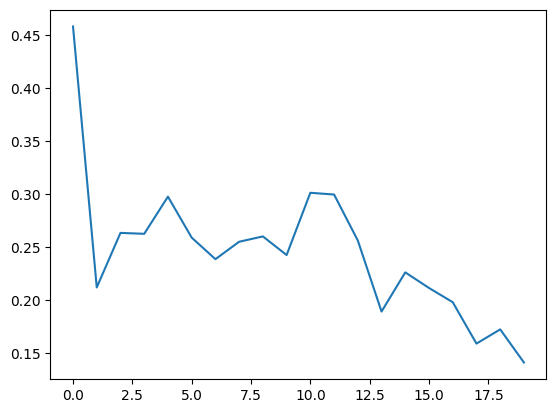

In [95]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [96]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

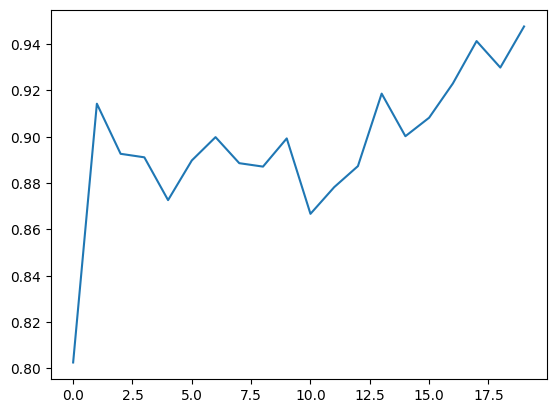

In [97]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])



# Save The Model

In [98]:
# The result will show in colab directory
network.save('network', save_format= 'h5')
# Menyimpan model yang telah dilatih dalam format h5 dengan nama 'network'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [99]:
# Import library
from tensorflow.keras.models import load_model

In [104]:
# Load saved network
# Memuat kembali jaringan yang telah disimpan sebelumnya
load_network = load_model('network')

In [105]:
# Check summary
# Menampilkan ringkasan atau struktur dari model yang dimuat kembali
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [107]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

AttributeError: ignored

In [ ]:
# Check shape
img.shape

In [ ]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

In [ ]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [ ]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [ ]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

In [ ]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

In [ ]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

In [ ]:
# check label for 6
name_labels[6]